In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic-passengers.csv", sep=";")

# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing values

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [7]:
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

In [8]:
df.dropna(subset=["Embarked"], inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data conversion

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [11]:
df['Survived'] = df['Survived'].map({"Yes": 1, "No": 0})
df['Sex'] = df['Sex'].map({"male": 1, "female": 0})
df['Embarked'] = df['Embarked'].map({"Q": 2, "S": 1, "C": 0})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


## Feature selection

In [13]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


# Model training

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *

import graphviz

In [15]:
X = df[[c for c in df.columns if c != 'Survived']].values
Y = df['Survived'].values
# Y = Y.reshape(-1, 1)
X.shape, Y.shape

((889, 7), (889,))

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [17]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy_score(Y_pred, Y_test)

0.797752808988764

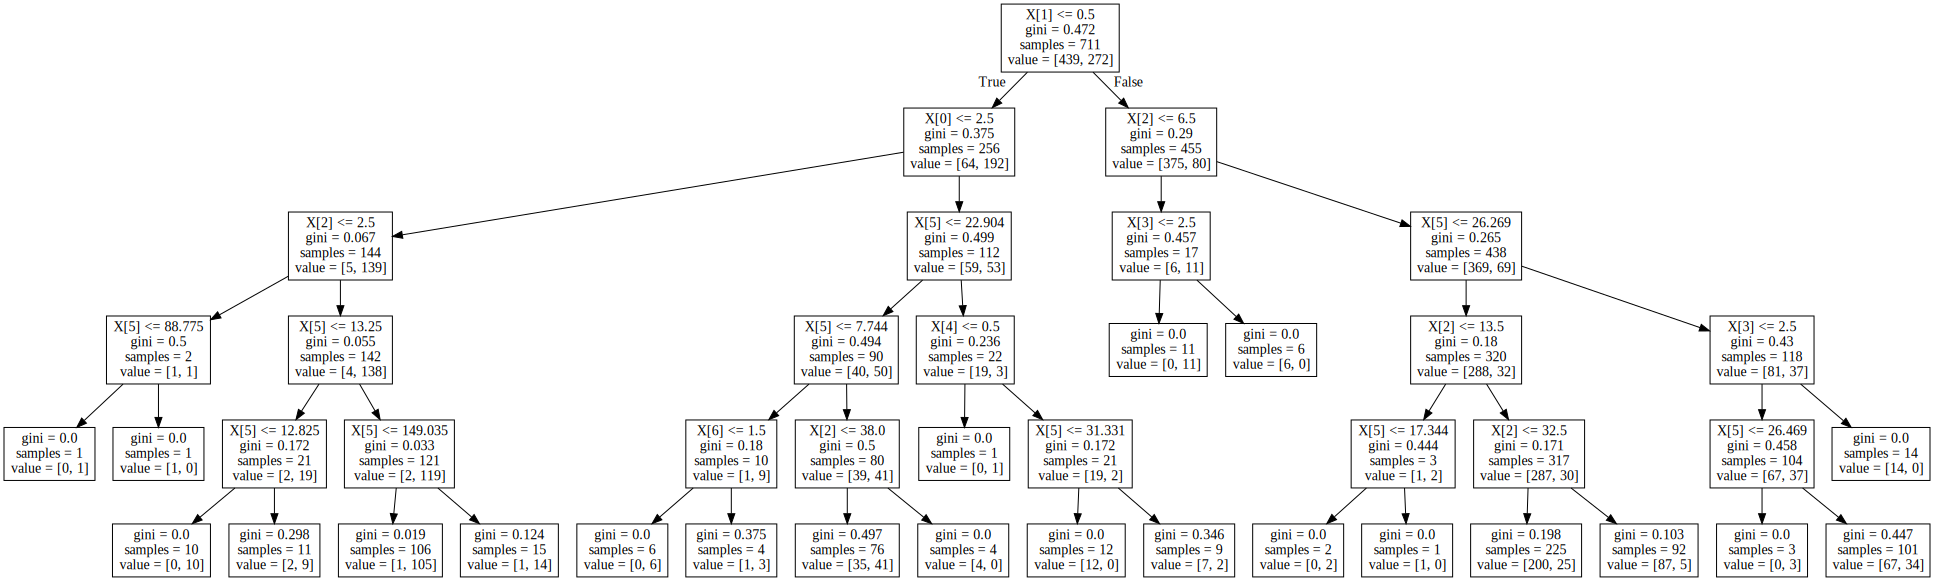

In [18]:
dot_data = export_graphviz(model)
graph = graphviz.Source(dot_data)
graph.render("data")
export_graphviz(model, out_file="tree.png")
graph

In [19]:
params = {"max_depth": [i for i in range(2, 10)], "max_leaf_nodes": [i for i in range(2, 25)]}
model = GridSearchCV(DecisionTreeClassifier(), params)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy_score(Y_pred, Y_test), model.best_params_

(0.7247191011235955, {'max_depth': 9, 'max_leaf_nodes': 20})

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy_score(Y_pred, Y_test)

0.7584269662921348

In [30]:
from datetime import datetime


start = datetime.now()

params = {"max_depth": [i for i in range(1, 11)]+[None], 
          "max_leaf_nodes": [i for i in range(1, 11)]+[None], 
          "n_estimators": [i for i in range(0, 100, 5)]
         }
model = GridSearchCV(RandomForestClassifier(), params)
model.fit(X_train, Y_train)

print(datetime.now() - start)

Y_pred = model.predict(X_test)

accuracy_score(Y_pred, Y_test), model.best_params_

0:12:18.076080


(0.7584269662921348, {'max_depth': 4, 'max_leaf_nodes': 8, 'n_estimators': 20})